In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [155]:
from sklearn.datasets import make_classification

In [156]:
X,y=make_classification(n_samples=100,n_features=2,n_informative=2,n_redundant=0,n_classes=2,n_clusters_per_class=2,random_state=2)

In [157]:
X.shape

(100, 2)

In [158]:
y.shape

(100,)

In [159]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1])

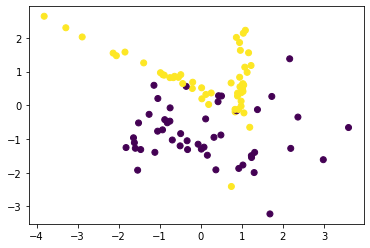

In [160]:

plt.scatter(X[:,0],X[:,-1],c=y[:])

In [161]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense 

In [162]:
model=Sequential()
model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 2)                 6         
                                                                 
 dense_25 (Dense)            (None, 2)                 6         
                                                                 
 dense_26 (Dense)            (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [163]:
model.get_weights()

[array([[-0.89778125, -0.36828482],
        [ 0.21657205, -1.1956052 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.8010253 , -0.43613148],
        [-0.20045674,  1.0428594 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 1.3124498 ],
        [-0.40610313]], dtype=float32),
 array([0.], dtype=float32)]

In [164]:


initial_weights=model.get_weights()

In [165]:
initial_weights[0]

array([[-0.89778125, -0.36828482],
       [ 0.21657205, -1.1956052 ]], dtype=float32)

In [166]:

initial_weights[1].shape

(2,)

In [167]:
initial_weights[2]

array([[-0.8010253 , -0.43613148],
       [-0.20045674,  1.0428594 ]], dtype=float32)

In [168]:
initial_weights[2].shape

(2, 2)

In [169]:
len(initial_weights)

6

In [170]:
initial_weights[0]=np.zeros(model.get_weights()[0].shape)
initial_weights[1]=np.zeros(model.get_weights()[1].shape)
initial_weights[2]=np.zeros(model.get_weights()[2].shape)
initial_weights[3]=np.zeros(model.get_weights()[3].shape)
initial_weights[4]=np.zeros(model.get_weights()[4].shape)
initial_weights[5]=np.zeros(model.get_weights()[5].shape)


In [171]:
model.set_weights(initial_weights)

In [172]:


model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [173]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [174]:

history=model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 96ms/step - loss: 0.6932 - accuracy: 0.4500 - val_loss: 0.6931 - val_accuracy: 0.5500
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5500
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 8/100
3/3 [===

In [175]:
# after traing we can see that weight is still zero and in verbose , we can aslo seen that accuracy and val_accuracy is constant, means our network is not trained even after 100 epochs

In [176]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.00779319], dtype=float32)]

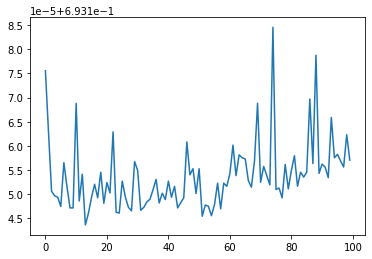

In [177]:
plt.plot(history.history['loss'])

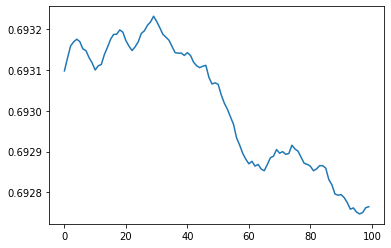

In [178]:
plt.plot(history.history['val_loss'])

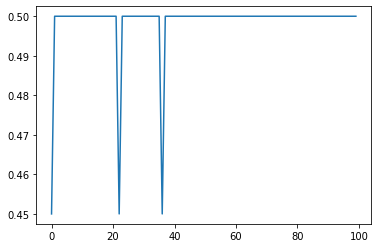

In [179]:
plt.plot(history.history['accuracy'])

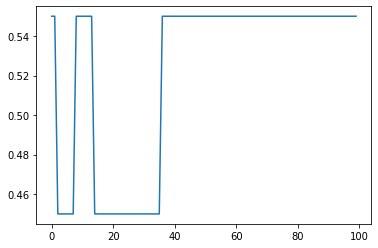

In [180]:
plt.plot(history.history['val_accuracy'])

In [181]:
model2=Sequential()
model2.add(Dense(2,activation='tanh',input_dim=2))
model2.add(Dense(2,activation='tanh'))
model2.add(Dense(1,activation='sigmoid'))

In [182]:
initial_weights2=model2.get_weights()
initial_weights2[0]=np.zeros(model2.get_weights()[0].shape)
initial_weights2[1]=np.zeros(model2.get_weights()[1].shape)
initial_weights2[2]=np.zeros(model2.get_weights()[2].shape)
initial_weights2[3]=np.zeros(model2.get_weights()[3].shape)
initial_weights2[4]=np.zeros(model2.get_weights()[4].shape)
initial_weights2[5]=np.zeros(model2.get_weights()[5].shape)

In [183]:
model2.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [184]:
model2.set_weights(initial_weights2)

In [185]:
model2.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [186]:
history2=model2.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 87ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 5/100
3/3 [==============================] - 0s 25ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 7/100
3/3 [==============================] - 0s 24ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 8/100
3/3 [===

In [188]:
# for tanh function also we can see that once we initialize the weight to zero then even after 100 epochs, still weight of the network is zero
model2.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.00629949], dtype=float32)]